### 생존율 예측

Ensemble Model 성능:
Accuracy: 0.83

Confusion Matrix:
[[99  6]
 [25 49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       105
           1       0.89      0.66      0.76        74

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.84      0.83      0.82       179



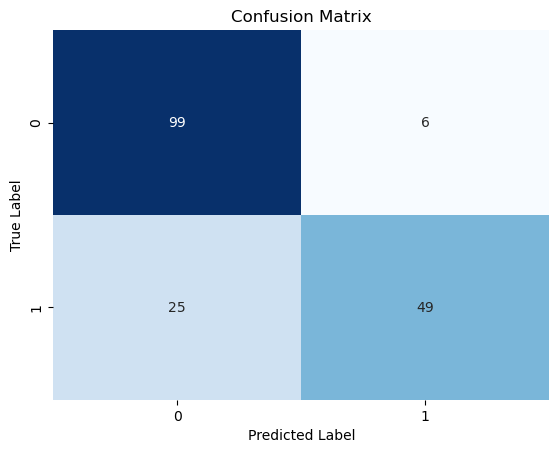

In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset("titanic")

# 사분위수 계산
q1 = titanic['age'].quantile(0.25)
q2 = titanic['age'].quantile(0.5)
q3 = titanic['age'].quantile(0.75)

# 나이를 구간으로 변환하는 함수 정의
def categorize_age(age):
    if age <= q1:
        return 1
    elif q1 < age <= q2:
        return 2
    elif q2 < age <= q3:
        return 3
    else:
        return 4

# 나이를 범주화하여 새로운 열 추가
titanic['age_category'] = titanic['age'].apply(categorize_age)

# Preprocess the data (handle missing values, create dummy variables, etc.)
# For simplicity, let's focus on a few relevant columns
selected_columns = ['survived', 'sex', 'age_category', 'pclass', 'alone']
titanic = titanic[selected_columns].dropna()


# Create dummy variables for the 'sex' column
titanic = pd.get_dummies(titanic, columns=['sex'], drop_first=True)

# Define the independent variables (X) and the dependent variable (y)
X = titanic[['sex_male', 'age_category', 'pclass', 'alone']]
y = titanic['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Gradient Boosting 모델 생성
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Random Forest 모델 훈련
rf_model.fit(X_train, y_train)

# Gradient Boosting 모델 훈련
gb_model.fit(X_train, y_train)

# Random Forest 모델 예측
rf_pred = rf_model.predict(X_test)

# Gradient Boosting 모델 예측
gb_pred = gb_model.predict(X_test)

# 앙상블 모델 예측
ensemble_pred = (rf_pred + gb_pred) // 2  # 간단한 투표 방식

# 앙상블 모델 성능 평가
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_conf_matrix = confusion_matrix(y_test, ensemble_pred)

# 결과 출력
print("Ensemble Model 성능:")
print(f"Accuracy: {ensemble_accuracy:.2f}")
print("\nConfusion Matrix:")
print(ensemble_conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, ensemble_pred))

# Plot the confusion matrix
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
def predict_titanic(data):
    # Random Forest 모델 예측
    rf_pred_prob = rf_model.predict_proba(data)[:, 1]

    # Gradient Boosting 모델 예측
    gb_pred_prob = gb_model.predict_proba(data)[:, 1]

    # 앙상블 모델 예측
    ensemble_pred_prob = (rf_pred_prob + gb_pred_prob) / 2  # 간단한 투표 방식

    return ensemble_pred_prob[0]

In [24]:
def get_data():
    gen = input("성별: ")
    if gen == "남자" or gen == "남" or gen == "1" :
        gen = [True]
    elif gen == "여자" or gen == "여" or gen == "0" :
        gen = [False]
    else :
        print("잘못 입력하셨습니다.")

    age = int(input("나이 : "))
    age = [categorize_age(age)]

    pclass = [int(input("객석등급 : "))]

    family = int(input("동승자 : "))
    check_family = lambda x : True if x == 0 else False
    alone = [check_family(family)]

    data = {
        'sex_male': gen,
        'age_category': age,
        'pclass': pclass,
        'alone': alone
    }
    df = pd.DataFrame(data)
    
    return df

In [36]:
df = get_data()
p = predict_titanic(df)
print("생존율 : {:.2f}%".format(p*100))

성별:  여자
나이 :  15
객석등급 :  1
동승자 :  2


생존율 : 87.10%


### tkinter로 gui만들기

In [49]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import pandas as pd

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset("titanic")

# 사분위수 계산
q1 = titanic['age'].quantile(0.25)
q2 = titanic['age'].quantile(0.5)
q3 = titanic['age'].quantile(0.75)

# 나이를 구간으로 변환하는 함수 정의
def categorize_age(age):
    if age <= q1:
        return 1
    elif q1 < age <= q2:
        return 2
    elif q2 < age <= q3:
        return 3
    else:
        return 4
    
    
def learning_titanic(titanic):
    # 나이를 범주화하여 새로운 열 추가
    titanic['age_category'] = titanic['age'].apply(categorize_age)

    # Preprocess the data (handle missing values, create dummy variables, etc.)
    # For simplicity, let's focus on a few relevant columns
    selected_columns = ['survived', 'sex', 'age_category', 'pclass', 'alone']
    titanic = titanic[selected_columns].dropna()


    # Create dummy variables for the 'sex' column
    titanic = pd.get_dummies(titanic, columns=['sex'], drop_first=True)

    # Define the independent variables (X) and the dependent variable (y)
    X = titanic[['sex_male', 'age_category', 'pclass', 'alone']]
    y = titanic['survived']

    # Random Forest 모델 생성
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Gradient Boosting 모델 생성
    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

    # Random Forest 모델 훈련
    rf_model.fit(X, y)

    # Gradient Boosting 모델 훈련
    gb_model.fit(X, y)
    
    return rf_model, gb_model


def predict_titanic(data):
    # Random Forest 모델 예측
    rf_pred_prob = rf_model.predict_proba(data)[:, 1]

    # Gradient Boosting 모델 예측
    gb_pred_prob = gb_model.predict_proba(data)[:, 1]

    # 앙상블 모델 예측
    ensemble_pred_prob = (rf_pred_prob + gb_pred_prob) / 2  # 간단한 투표 방식

    return ensemble_pred_prob[0]

In [50]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox

class Prediction():
    def __init__(self):
        self.rf_model, self.gb_model = learning_titanic(titanic)
        self.run()
    
    def run(self):
        # Tk 객체 생성
        self.root = tk.Tk()
        self.root.title("Prediction")
        self.root.geometry("300x250")
        self.root.resizable(0,0)

        # 레이블 생성
        self.label = tk.Label(self.root, text="타이타닉 생존율 예측")
        self.label.grid(row=0, column=0, columnspan=2, padx=10, pady=10)

        self.gen_strs = tk.StringVar() #변수선언
        self.pclass_strs = tk.StringVar()


        self.gen_label = tk.Label(self.root, text="성별")
        self.gen_label.grid(row=1, column=0, padx=10, pady=5, sticky="e")
        self.Combx1 = ttk.Combobox(textvariable=self.gen_strs) #콤보박스 선언
        self.Combx1['value'] = ('남자','여자') #콤보박스 요소 삽입
        self.Combx1.current(0) #0번째로 콤보박스 초기화
        self.Combx1.grid(row=1,column=1, padx=10, pady=5, sticky="w") #콤보박스 배치


        self.age_lable = tk.Label(self.root, text="나이")
        self.age_lable.grid(row=2, column=0, padx=10, pady=5, sticky="e")
        self.age_entry = tk.Entry(self.root, width=23)
        self.age_entry.grid(row=2, column=1, padx=10, pady=5, sticky="w")

        self.pclass_label = tk.Label(self.root, text="객석등급")
        self.pclass_label.grid(row=3, column=0, padx=10, pady=5, sticky="e")
        self.Combx2 = ttk.Combobox(textvariable=self.pclass_strs)
        self.Combx2['value'] = ('1','2','3')
        self.Combx2.current(0)
        self.Combx2.grid(row=3,column=1, padx=10, pady=5, sticky="w")


        self.alone_label = tk.Label(self.root, text="동승자")
        self.alone_label.grid(row=4, column=0, padx=10, pady=5, sticky="e")
        self.alone_entry = tk.Entry(self.root, width=23)
        self.alone_entry.grid(row=4, column=1, padx=10, pady=5, sticky="w")

        self.result_label = tk.Label(self.root, text="")
        self.result_label.grid(row=5, column=0, columnspan=2, padx=10, pady=10)

        # 버튼 생성
        self.predict_button = tk.Button(self.root, text="Predict", command=self.predict)
        self.predict_button.grid(row=6, column=1, padx=10, pady=10, sticky="e")

        # 이벤트 루프 시작
        self.root.mainloop()
        
    
    def get_data(self):
        gen = self.gen_strs.get()
        if gen == "남자" :
            gen = [True]
        else :
            gen = [False]

        try:
            age = int(self.age_entry.get())
        except:
            messagebox.showwarning("Warning", "숫자를 입력하세요.")
        age = [categorize_age(age)]

        pclass = [int(self.pclass_strs.get())]

        try:
            alone = int(self.alone_entry.get())
        except:
            messagebox.showwarning("Warning", "숫자를 입력하세요.")
        check_alone = lambda x : True if x == 0 else False
        alone = [check_alone(alone)]

        data = {
            'sex_male': gen,
            'age_category': age,
            'pclass': pclass,
            'alone': alone
        }
        df = pd.DataFrame(data)

        return df
        
    # 예측 버튼 함수
    def predict(self):
        data = self.get_data()
        result = predict_titanic(data)
        self.result_label.config(text="생존율 : {:.2f}%".format(result*100))

In [51]:
prediction = Prediction()